# 統計基礎② - 確率・分布（シンプル版）

今日は、確率と確率分布について学びます。
難しい理論は省いて、身近な例で理解しましょう！

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import stats
import seaborn as sns

# 警告を抑制
import warnings
warnings.filterwarnings('ignore')

## 1. 確率の基本

確率は「ある事象が起こる可能性」を0〜1の数値で表したものです。

In [3]:
# サイコロを振る例
print("🎲 サイコロを振る確率")
print("="*30)

# 1が出る確率
prob_1 = 1/6
print(f"1が出る確率: {prob_1:.3f} ({prob_1*100:.1f}%)")

# 偶数が出る確率（2, 4, 6）
prob_even = 3/6
print(f"偶数が出る確率: {prob_even:.3f} ({prob_even*100:.1f}%)")

# 7が出る確率（不可能）
prob_7 = 0/6
print(f"7が出る確率: {prob_7:.3f} ({prob_7*100:.1f}%)")

# 何かが出る確率（確実）
prob_any = 6/6
print(f"1〜6のどれかが出る確率: {prob_any:.3f} ({prob_any*100:.1f}%)")

🎲 サイコロを振る確率
1が出る確率: 0.167 (16.7%)
偶数が出る確率: 0.500 (50.0%)
7が出る確率: 0.000 (0.0%)
1〜6のどれかが出る確率: 1.000 (100.0%)


### 💡 `np.random.randint()` - 整数の乱数生成

```python
np.random.randint(low, high, size=数量)
```
- **low**: 最小値（含む）
- **high**: 最大値（含まない）
- **size**: 生成する乱数の個数
- **用途**: サイコロ、抽選、ゲームのシミュレーション

In [4]:
# 実際にサイコロをシミュレーション
np.random.seed(42)

# サイコロを1000回振る
dice_rolls = np.random.randint(1, 7, size=1000)

# 各目の出現回数
unique, counts = np.unique(dice_rolls, return_counts=True)

print("\n🎲 サイコロ1000回の結果")
print("="*30)
for face, count in zip(unique, counts):
    prob = count / 1000
    print(f"{face}: {count}回 ({prob:.3f}, {prob*100:.1f}%)")

print(f"\n理論値: 各面 {1/6:.3f} ({1/6*100:.1f}%)")


🎲 サイコロ1000回の結果
1: 181回 (0.181, 18.1%)
2: 164回 (0.164, 16.4%)
3: 154回 (0.154, 15.4%)
4: 174回 (0.174, 17.4%)
5: 172回 (0.172, 17.2%)
6: 155回 (0.155, 15.5%)

理論値: 各面 0.167 (16.7%)


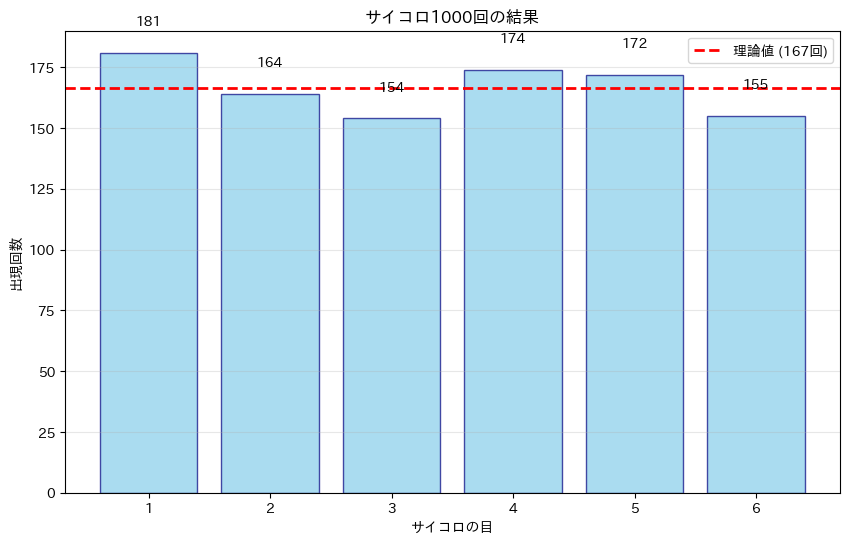

In [6]:
# サイコロの結果を可視化
plt.figure(figsize=(10, 6))

# 棒グラフ
bars = plt.bar(unique, counts, color='skyblue', alpha=0.7, edgecolor='navy')
plt.axhline(y=1000/6, color='red', linestyle='--', linewidth=2, label=f'理論値 ({1000/6:.0f}回)')

# 各棒に数値を表示
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             str(count), ha='center', va='bottom')

plt.xlabel('サイコロの目')
plt.ylabel('出現回数')
plt.title('サイコロ1000回の結果')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

### 💡 確率のポイント
- 確率は 0 ≤ P ≤ 1 の範囲
- 0 = 絶対起こらない、1 = 必ず起こる
- 試行回数が多いほど理論値に近づく（大数の法則）

## 2. 離散確率分布

取りうる値が決まっている確率分布です。

### 2.1 ベルヌーイ分布（コイン投げ）

### 💡 `np.random.binomial()` - 二項分布からのサンプリング

```python
np.random.binomial(n, p, size=数量)
```
- **n**: 試行回数（例：投げる回数）
- **p**: 1回あたりの成功確率（例：0.5 = 50%）
- **size**: シミュレーション回数
- **戻り値**: n回中の成功回数（0〜nの整数）

### 💡 `np.cumsum()` - 累積合計の計算

```python
np.cumsum(array)
```
- **機能**: 配列の要素を順番に足し上げる
- **例**: [1, 1, 0, 1] → [1, 2, 2, 3]
- **用途**: 累積回数、累積確率、時系列の累積値を計算

In [5]:
# コイン投げのシミュレーション
print("🪙 コイン投げ")
print("="*20)

# 表が出る確率 = 0.5
p_heads = 0.5

# 100回投げる
coin_flips = np.random.binomial(1, p_heads, size=100)
# 1 = 表, 0 = 裏

heads_count = np.sum(coin_flips)
tails_count = 100 - heads_count

print(f"表: {heads_count}回 ({heads_count}%)")
print(f"裏: {tails_count}回 ({tails_count}%)")
print(f"\n理論値: 表50回, 裏50回")

🪙 コイン投げ
表: 48回 (48%)
裏: 52回 (52%)

理論値: 表50回, 裏50回


### 💡 `stats.binom.pmf()` - 二項分布の確率質量関数

```python
stats.binom.pmf(k, n, p)
```
- **k**: 成功回数（0〜nの値）
- **n**: 試行回数
- **p**: 成功確率
- **戻り値**: ちょうどk回成功する確率
- **PMF**: Probability Mass Function（離散分布の確率計算）

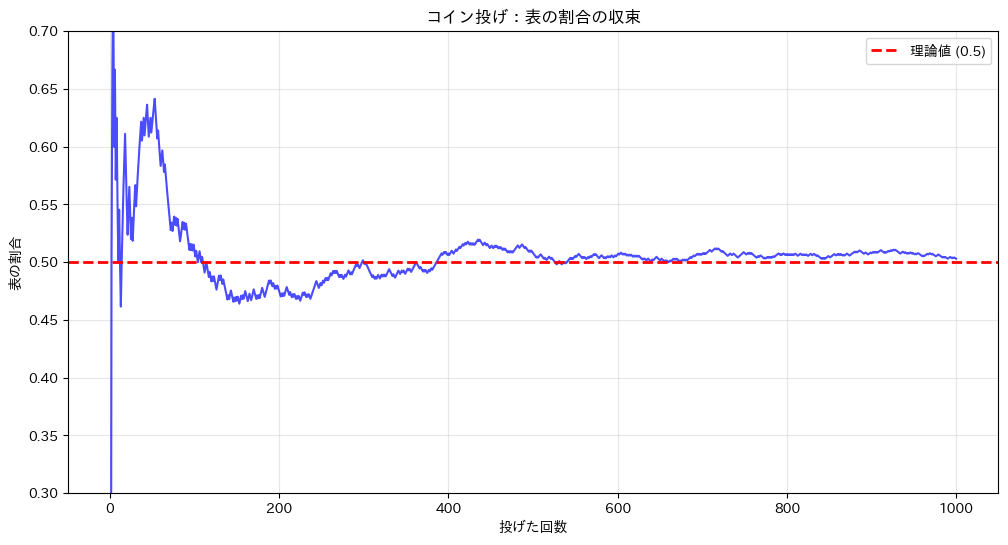

最終的な表の割合: 0.503


In [6]:
# コイン投げの累積結果
n_flips = 1000
flips = np.random.binomial(1, 0.5, size=n_flips)
cumulative_heads = np.cumsum(flips)
proportion_heads = cumulative_heads / np.arange(1, n_flips + 1)

plt.figure(figsize=(12, 6))
plt.plot(range(1, n_flips + 1), proportion_heads, color='blue', alpha=0.7)
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='理論値 (0.5)')
plt.xlabel('投げた回数')
plt.ylabel('表の割合')
plt.title('コイン投げ：表の割合の収束')
plt.legend()
plt.grid(alpha=0.3)
plt.ylim(0.3, 0.7)
plt.show()

print(f"最終的な表の割合: {proportion_heads[-1]:.3f}")

### 2.2 二項分布（複数回の成功・失敗）

### 💡 ポアソン分布の重要メソッド

#### `stats.poisson.pmf()` - 確率質量関数
```python
stats.poisson.pmf(k, λ)
```
- **k**: 発生回数
- **λ**: 平均発生回数
- **戻り値**: ちょうどk回起こる確率

#### `stats.poisson.cdf()` - 累積分布関数
```python
stats.poisson.cdf(k, λ)
```
- **戻り値**: k回以下が起こる確率
- **活用**: 「5回以上」は `1 - cdf(4)` で計算

🏀 バスケの自由投げ
10回投げて平均7.0回成功
理論値: 7.0回


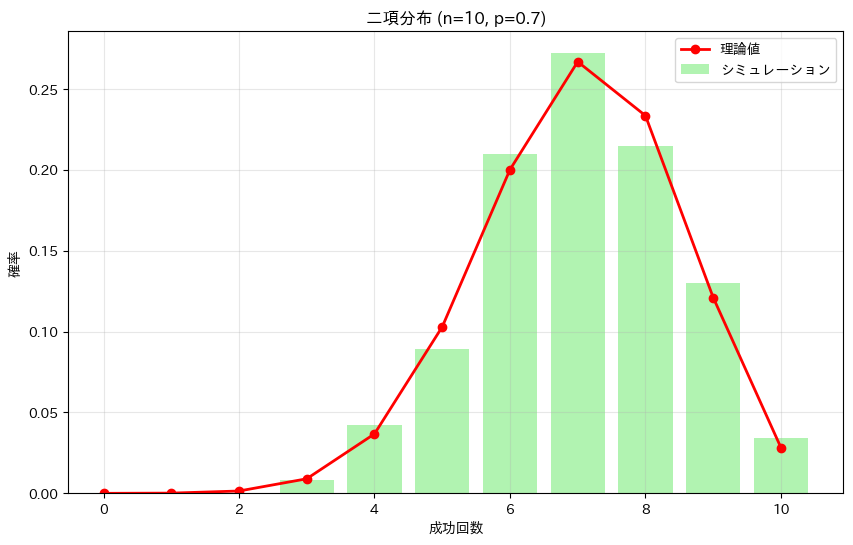

In [7]:
# 自由投げシュートの例
print("🏀 バスケの自由投げ")
print("="*25)

# 成功確率 70%のプレイヤーが10回投げる
n_shots = 10
p_success = 0.7

# 1回のゲームでの成功回数をシミュレーション
successes = np.random.binomial(n_shots, p_success, size=1000)

print(f"10回投げて平均{np.mean(successes):.1f}回成功")
print(f"理論値: {n_shots * p_success}回")

# 分布の可視化
plt.figure(figsize=(10, 6))
unique, counts = np.unique(successes, return_counts=True)
probabilities = counts / len(successes)

# 理論値も計算
x_theory = np.arange(0, n_shots + 1)
y_theory = stats.binom.pmf(x_theory, n_shots, p_success)

plt.bar(unique, probabilities, alpha=0.7, color='lightgreen', label='シミュレーション')
plt.plot(x_theory, y_theory, 'ro-', label='理論値', linewidth=2)

plt.xlabel('成功回数')
plt.ylabel('確率')
plt.title(f'二項分布 (n={n_shots}, p={p_success})')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### 2.3 ポアソン分布（稀な事象の発生）

### 💡 `np.random.normal()` - 正規分布からのサンプリング

```python
np.random.normal(loc=平均, scale=標準偏差, size=数量)
```
- **loc**: 分布の中心（平均値）
- **scale**: 分布の幅（標準偏差）
- **size**: 生成するサンプル数
- **用途**: 身長、体重、テスト点数など自然現象の多くがこの分布に従う

🏪 お店の来客数
平均来客数: 3.0人/時間
理論値: 3人/時間


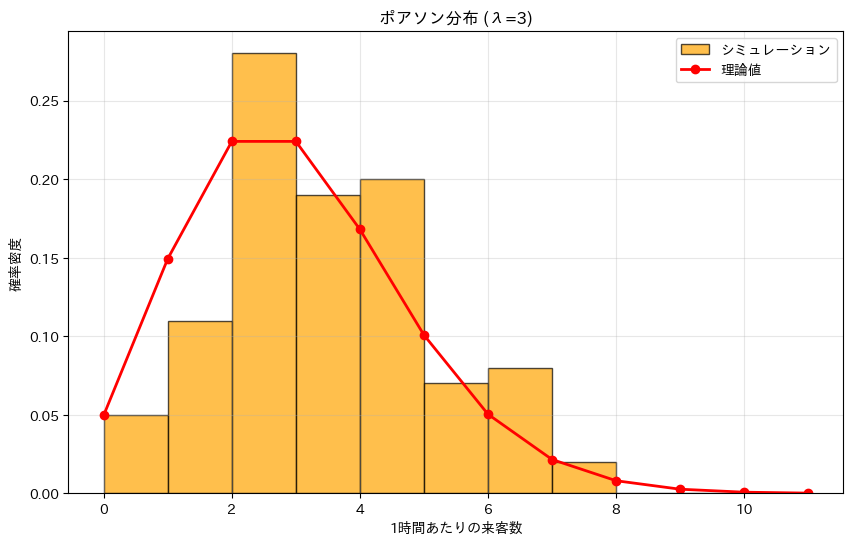

In [8]:
# 1時間あたりの来客数の例
print("🏪 お店の来客数")
print("="*20)

# 平均で1時間に3人来店
lambda_customers = 3

# 100時間分のデータをシミュレーション
customers_per_hour = np.random.poisson(lambda_customers, size=100)

print(f"平均来客数: {np.mean(customers_per_hour):.1f}人/時間")
print(f"理論値: {lambda_customers}人/時間")

# 分布の可視化
plt.figure(figsize=(10, 6))

# ヒストグラム
plt.hist(customers_per_hour, bins=range(0, 12), density=True, alpha=0.7, 
         color='orange', edgecolor='black', label='シミュレーション')

# 理論値
x_theory = np.arange(0, 12)
y_theory = stats.poisson.pmf(x_theory, lambda_customers)
plt.plot(x_theory, y_theory, 'ro-', label='理論値', linewidth=2)

plt.xlabel('1時間あたりの来客数')
plt.ylabel('確率密度')
plt.title(f'ポアソン分布 (λ={lambda_customers})')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### 💡 正規分布の重要メソッド

#### `stats.norm.cdf()` - 累積分布関数
```python
stats.norm.cdf(x, loc=平均, scale=標準偏差)
```
- **戻り値**: x以下の値が出る確率
- **例**: cdf(180) = 180cm以下の人の割合

#### `stats.norm.ppf()` - パーセント点関数（逆CDF）
```python  
stats.norm.ppf(q, loc=平均, scale=標準偏差)
```
- **q**: 確率（0〜1）
- **戻り値**: その確率に対応する値
- **例**: ppf(0.9) = 上位10%のボーダー値

In [9]:
# 実用的な質問
print("📊 実用的な確率計算")
print("="*30)

# 1時間に5人以上来る確率
prob_5_or_more = 1 - stats.poisson.cdf(4, lambda_customers)
print(f"1時間に5人以上来る確率: {prob_5_or_more:.3f} ({prob_5_or_more*100:.1f}%)")

# 1時間に誰も来ない確率
prob_0 = stats.poisson.pmf(0, lambda_customers)
print(f"1時間に誰も来ない確率: {prob_0:.3f} ({prob_0*100:.1f}%)")

# ちょうど3人来る確率（最も確率が高い）
prob_3 = stats.poisson.pmf(3, lambda_customers)
print(f"ちょうど3人来る確率: {prob_3:.3f} ({prob_3*100:.1f}%)")

📊 実用的な確率計算
1時間に5人以上来る確率: 0.185 (18.5%)
1時間に誰も来ない確率: 0.050 (5.0%)
ちょうど3人来る確率: 0.224 (22.4%)


## 3. 連続確率分布

連続的な値を取る確率分布です。

### 3.1 正規分布（ガウス分布）

In [10]:
# 身長の分布を例に
print("📏 日本人男性の身長分布")
print("="*30)

# 平均172cm、標準偏差6cmと仮定
height_mean = 172
height_std = 6

# 1000人分の身長データを生成
heights = np.random.normal(height_mean, height_std, size=1000)

print(f"平均身長: {np.mean(heights):.1f}cm")
print(f"標準偏差: {np.std(heights):.1f}cm")
print(f"最高身長: {np.max(heights):.1f}cm")
print(f"最低身長: {np.min(heights):.1f}cm")

📏 日本人男性の身長分布
平均身長: 172.0cm
標準偏差: 5.9cm
最高身長: 190.4cm
最低身長: 152.1cm


### 💡 `np.random.uniform()` - 一様分布からのサンプリング

```python
np.random.uniform(low=最小値, high=最大値, size=数量)
```
- **low**: 範囲の下限
- **high**: 範囲の上限  
- **特徴**: 指定範囲内で全ての値が等確率
- **用途**: ランダムな待ち時間、抽選、ゲームの要素

### 💡 確率密度関数（PDF）メソッド

#### `stats.uniform.pdf()` - 一様分布の確率密度
```python
stats.uniform.pdf(x, loc=開始点, scale=幅)
```
- **PDF**: Probability Density Function
- **連続分布**: 点の確率ではなく密度を表す
- **用途**: 分布の形状を描画、理論値との比較

#### その他のPDFメソッド
- `stats.norm.pdf()`: 正規分布
- `stats.expon.pdf()`: 指数分布

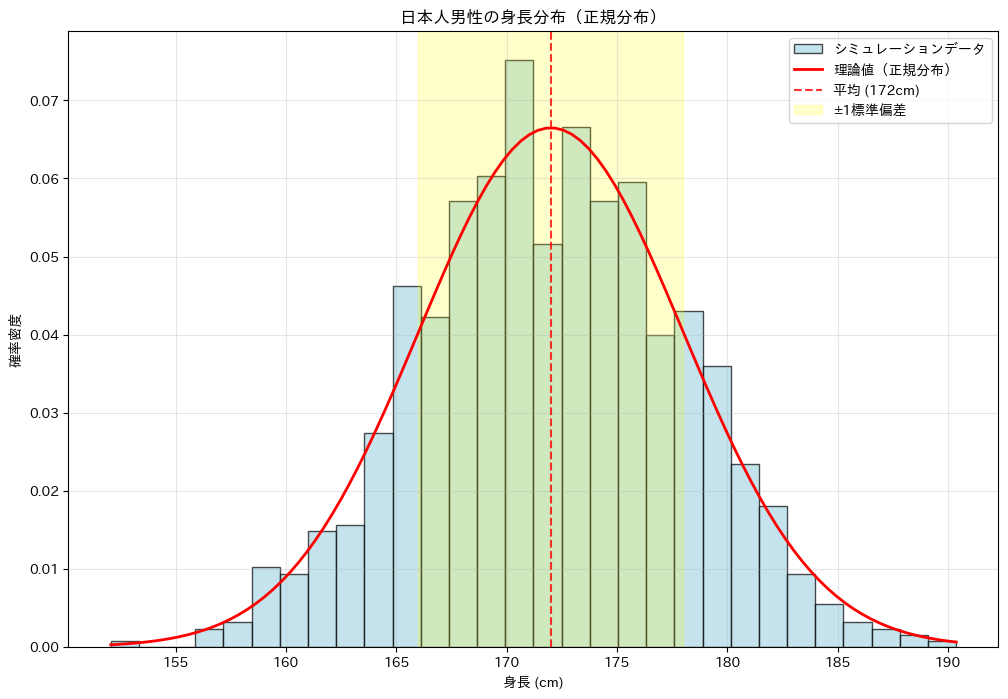

In [11]:
# 正規分布の可視化
plt.figure(figsize=(12, 8))

# ヒストグラム
plt.hist(heights, bins=30, density=True, alpha=0.7, color='lightblue', 
         edgecolor='black', label='シミュレーションデータ')

# 理論的な正規分布曲線
x = np.linspace(heights.min(), heights.max(), 100)
y = stats.norm.pdf(x, height_mean, height_std)
plt.plot(x, y, 'r-', linewidth=2, label='理論値（正規分布）')

# 平均と標準偏差の範囲を表示
plt.axvline(height_mean, color='red', linestyle='--', alpha=0.8, label=f'平均 ({height_mean}cm)')
plt.axvspan(height_mean - height_std, height_mean + height_std, 
            alpha=0.2, color='yellow', label='±1標準偏差')

plt.xlabel('身長 (cm)')
plt.ylabel('確率密度')
plt.title('日本人男性の身長分布（正規分布）')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [12]:
# 正規分布を使った確率計算
print("📊 身長に関する確率")
print("="*25)

# 180cm以上の確率
prob_180_or_more = 1 - stats.norm.cdf(180, height_mean, height_std)
print(f"180cm以上: {prob_180_or_more:.3f} ({prob_180_or_more*100:.1f}%)")

# 160cm未満の確率
prob_under_160 = stats.norm.cdf(160, height_mean, height_std)
print(f"160cm未満: {prob_under_160:.3f} ({prob_under_160*100:.1f}%)")

# 165cm〜175cmの確率
prob_165_175 = stats.norm.cdf(175, height_mean, height_std) - stats.norm.cdf(165, height_mean, height_std)
print(f"165〜175cm: {prob_165_175:.3f} ({prob_165_175*100:.1f}%)")

# 上位10%に入る身長
height_90th = stats.norm.ppf(0.9, height_mean, height_std)
print(f"\n上位10%の身長: {height_90th:.1f}cm以上")

📊 身長に関する確率
180cm以上: 0.091 (9.1%)
160cm未満: 0.023 (2.3%)
165〜175cm: 0.570 (57.0%)

上位10%の身長: 179.7cm以上


### 3.2 標準正規分布（Z分布）

In [13]:
# 標準化（Z値）の計算
print("📐 標準化（Z値）")
print("="*20)

# ある人の身長が178cmだった場合
my_height = 178
z_score = (my_height - height_mean) / height_std

print(f"身長 {my_height}cm のZ値: {z_score:.2f}")
print(f"この身長より低い人の割合: {stats.norm.cdf(z_score):.3f} ({stats.norm.cdf(z_score)*100:.1f}%)")

# 複数の身長を標準化
sample_heights = [160, 165, 170, 175, 180, 185]
z_scores = [(h - height_mean) / height_std for h in sample_heights]

print("\n身長の標準化例:")
for height, z in zip(sample_heights, z_scores):
    percentile = stats.norm.cdf(z) * 100
    print(f"{height}cm → Z = {z:5.2f} (上位{100-percentile:4.1f}%)")

📐 標準化（Z値）
身長 178cm のZ値: 1.00
この身長より低い人の割合: 0.841 (84.1%)

身長の標準化例:
160cm → Z = -2.00 (上位97.7%)
165cm → Z = -1.17 (上位87.8%)
170cm → Z = -0.33 (上位63.1%)
175cm → Z =  0.50 (上位30.9%)
180cm → Z =  1.33 (上位 9.1%)
185cm → Z =  2.17 (上位 1.5%)


### 3.3 その他の重要な分布

### 🎯 練習問題の解答解説

#### 問題1のポイント
- **ポアソン分布**: 稀な事象（来客）の発生回数をモデル化
- **pmf()**: ちょうどその回数が起こる確率
- **cdf()**: その回数以下が起こる累積確率
- **ppf()**: 指定した確率に対応する値（パーセント点）

#### 問題2のポイント  
- **正規分布**: 連続値（点数）の分布をモデル化
- **Z値**: 平均からの標準偏差での距離
- **cdf()**: 累積分布関数で順位を計算
- **ppf()**: 上位〇%のボーダー点数を計算

In [ ]:
# ECサイトの売上分析 - 応用問題解答例
print("🛒 ECサイトの売上分析 - 応用問題解答例")
print("=" * 45)

# パラメータ
orders_per_day = 30  # 平均注文件数/日（ポアソン分布）
amount_mean = 5000   # 平均注文金額（円）
amount_std = 1000    # 注文金額の標準偏差（円）

# 1. 1日に40件以上の注文が入る確率
prob_40_or_more_orders = 1 - stats.poisson.cdf(39, orders_per_day)
print(f"1. 1日に40件以上の注文が入る確率: {prob_40_or_more_orders:.4f} ({prob_40_or_more_orders*100:.2f}%)")

# 2. 1日の売上が20万円を超える確率（簡易計算）
# 日次売上 = 注文件数 × 平均注文金額として近似
daily_sales_mean = orders_per_day * amount_mean  # 150,000円
# 注文件数はポアソン分布、注文金額は正規分布なので、
# 正確には複雑だが、中心極限定理により売上も近似的に正規分布と仮定

# 売上の分散 ≈ E[注文件数] × Var[注文金額] + Var[注文件数] × E[注文金額]²
sales_variance = orders_per_day * (amount_std**2) + orders_per_day * (amount_mean**2)
sales_std = np.sqrt(sales_variance)

prob_sales_over_200k = 1 - stats.norm.cdf(200000, daily_sales_mean, sales_std)
print(f"2. 1日の売上が20万円を超える確率: {prob_sales_over_200k:.4f} ({prob_sales_over_200k*100:.2f}%)")
print(f"   （平均売上: {daily_sales_mean/10000:.1f}万円, 標準偏差: {sales_std/10000:.1f}万円）")

# 3. 月間（30日）で最も売上が高い日の予想売上額（上位3.3%）
top_sales_97th = stats.norm.ppf(0.967, daily_sales_mean, sales_std)  # 100/30 ≈ 3.3%
print(f"3. 月間で最も売上が高い日の予想額: {top_sales_97th/10000:.1f}万円以上")

# シミュレーションで検証
np.random.seed(42)
n_days_sim = 1000

# 各日の注文件数をシミュレーション
daily_orders = np.random.poisson(orders_per_day, n_days_sim)

# 各日の売上をシミュレーション（簡易版：平均金額×件数）
daily_sales_simple = daily_orders * amount_mean

# より正確なシミュレーション：各注文の金額を個別生成
daily_sales_detailed = []
for orders in daily_orders[:100]:  # 計算量を抑えるため100日分のみ
    if orders > 0:
        order_amounts = np.random.normal(amount_mean, amount_std, orders)
        daily_sales_detailed.append(np.sum(order_amounts))
    else:
        daily_sales_detailed.append(0)

# 結果表示
print(f"\nシミュレーション結果（{n_days_sim}日分）:")
print(f"平均売上: {np.mean(daily_sales_simple)/10000:.1f}万円")
print(f"上位3%の売上: {np.percentile(daily_sales_simple, 97)/10000:.1f}万円以上")

# 売上分布の可視化
plt.figure(figsize=(12, 6))
plt.hist(daily_sales_simple/10000, bins=50, density=True, alpha=0.7, 
         color='lightcoral', edgecolor='black', label='シミュレーション売上')

# 理論的な分布
x_sales = np.linspace(daily_sales_simple.min(), daily_sales_simple.max(), 100)
y_sales = stats.norm.pdf(x_sales, daily_sales_mean, sales_std)
plt.plot(x_sales/10000, y_sales*10000, 'b-', linewidth=2, label='理論分布（近似）')

plt.axvline(daily_sales_mean/10000, color='blue', linestyle='--', linewidth=2, 
            label=f'平均売上 ({daily_sales_mean/10000:.1f}万円)')
plt.axvline(200000/10000, color='red', linestyle='--', linewidth=2, 
            label='20万円ライン')
plt.axvline(top_sales_97th/10000, color='purple', linestyle='--', linewidth=2, 
            label=f'上位3% ({top_sales_97th/10000:.1f}万円)')

plt.xlabel('日次売上 (万円)')
plt.ylabel('確率密度')
plt.title('ECサイトの日次売上分布')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 応用練習問題（チャレンジ）

### 問題3: ECサイトの売上分析
あるECサイトの1日の注文件数が平均30件のポアソン分布に従い、1件あたりの注文金額が平均5000円、標準偏差1000円の正規分布に従うとします。

1. 1日に40件以上の注文が入る確率
2. 1日の売上が20万円を超える確率（簡易計算）
3. 月間（30日）で最も売上が高い日の予想売上額（上位3.3%）

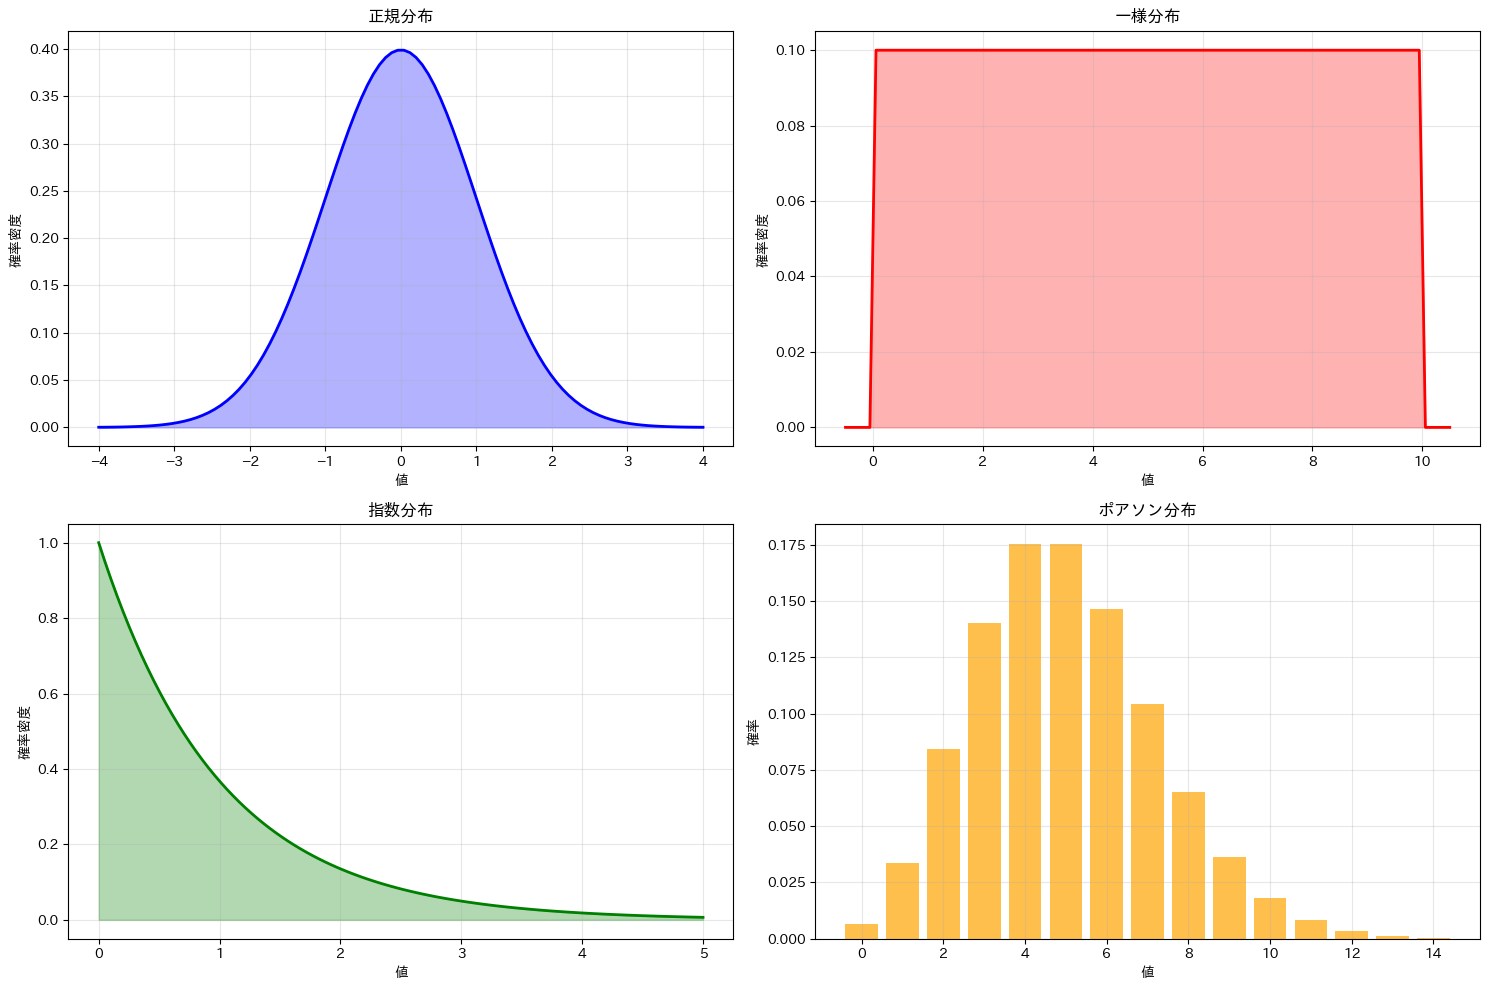

In [16]:
# 複数の分布を比較
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 正規分布
x_norm = np.linspace(-4, 4, 100)
y_norm = stats.norm.pdf(x_norm, 0, 1)
axes[0, 0].plot(x_norm, y_norm, 'b-', linewidth=2)
axes[0, 0].fill_between(x_norm, y_norm, alpha=0.3, color='blue')
axes[0, 0].set_title('正規分布')
axes[0, 0].set_xlabel('値')
axes[0, 0].set_ylabel('確率密度')
axes[0, 0].grid(alpha=0.3)

# 一様分布
x_uniform = np.linspace(-0.5, 10.5, 100)
y_uniform = stats.uniform.pdf(x_uniform, 0, 10)
axes[0, 1].plot(x_uniform, y_uniform, 'r-', linewidth=2)
axes[0, 1].fill_between(x_uniform, y_uniform, alpha=0.3, color='red')
axes[0, 1].set_title('一様分布')
axes[0, 1].set_xlabel('値')
axes[0, 1].set_ylabel('確率密度')
axes[0, 1].grid(alpha=0.3)

# 指数分布（待ち時間など）
x_exp = np.linspace(0, 5, 100)
y_exp = stats.expon.pdf(x_exp, scale=1)
axes[1, 0].plot(x_exp, y_exp, 'g-', linewidth=2)
axes[1, 0].fill_between(x_exp, y_exp, alpha=0.3, color='green')
axes[1, 0].set_title('指数分布')
axes[1, 0].set_xlabel('値')
axes[1, 0].set_ylabel('確率密度')
axes[1, 0].grid(alpha=0.3)

# ポアソン分布（離散）
x_poisson = np.arange(0, 15)
y_poisson = stats.poisson.pmf(x_poisson, 5)
axes[1, 1].bar(x_poisson, y_poisson, alpha=0.7, color='orange')
axes[1, 1].set_title('ポアソン分布')
axes[1, 1].set_xlabel('値')
axes[1, 1].set_ylabel('確率')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 4. 実用例：品質管理

In [17]:
# 製品の重量管理
print("🏭 製品の重量管理")
print("="*25)

# 目標重量100g、標準偏差2g
target_weight = 100
weight_std = 2

# 1000個の製品をシミュレーション
product_weights = np.random.normal(target_weight, weight_std, 1000)

# 規格外品の計算（95g未満または105g超過）
defective = np.sum((product_weights < 95) | (product_weights > 105))
defective_rate = defective / 1000 * 100

print(f"平均重量: {np.mean(product_weights):.2f}g")
print(f"標準偏差: {np.std(product_weights):.2f}g")
print(f"規格外品: {defective}個 ({defective_rate:.1f}%)")

# 理論的な不良率
theoretical_defect = (stats.norm.cdf(95, target_weight, weight_std) + 
                      (1 - stats.norm.cdf(105, target_weight, weight_std))) * 100
print(f"理論的不良率: {theoretical_defect:.2f}%")

🏭 製品の重量管理
平均重量: 99.99g
標準偏差: 1.94g
規格外品: 11個 (1.1%)
理論的不良率: 1.24%


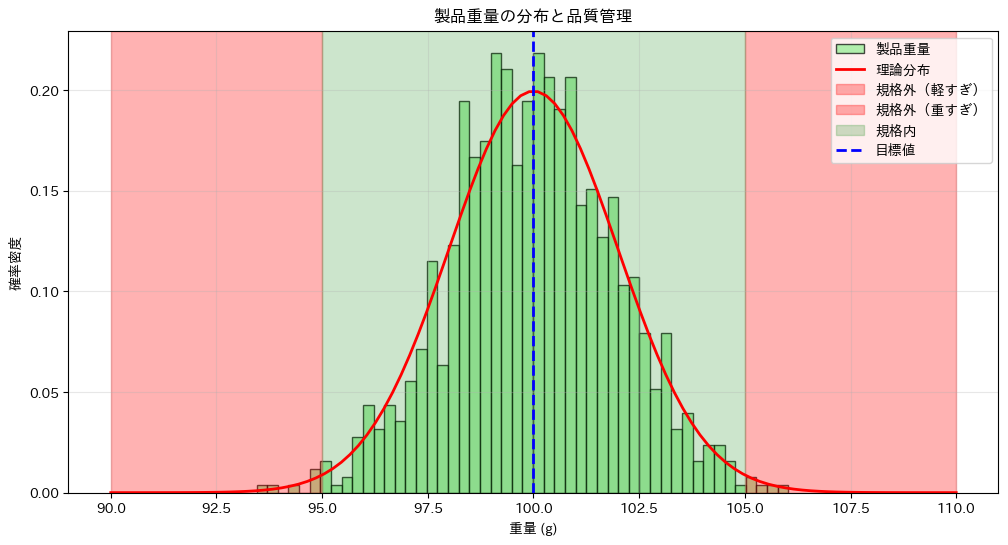

In [18]:
# 重量分布の可視化
plt.figure(figsize=(12, 6))

plt.hist(product_weights, bins=50, density=True, alpha=0.7, color='lightgreen', 
         edgecolor='black', label='製品重量')

# 理論分布
x = np.linspace(90, 110, 100)
y = stats.norm.pdf(x, target_weight, weight_std)
plt.plot(x, y, 'r-', linewidth=2, label='理論分布')

# 規格外範囲を表示
plt.axvspan(90, 95, alpha=0.3, color='red', label='規格外（軽すぎ）')
plt.axvspan(105, 110, alpha=0.3, color='red', label='規格外（重すぎ）')
plt.axvspan(95, 105, alpha=0.2, color='green', label='規格内')

plt.axvline(target_weight, color='blue', linestyle='--', linewidth=2, label='目標値')

plt.xlabel('重量 (g)')
plt.ylabel('確率密度')
plt.title('製品重量の分布と品質管理')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 練習問題

### 問題1: レストランの来客分析
あるレストランの1時間あたりの来客数がポアソン分布に従うとします。

1. 1時間に誰も来ない確率: 0.0183 (1.83%)
2. 1時間に5人以上来る確率: 0.3712 (37.12%)


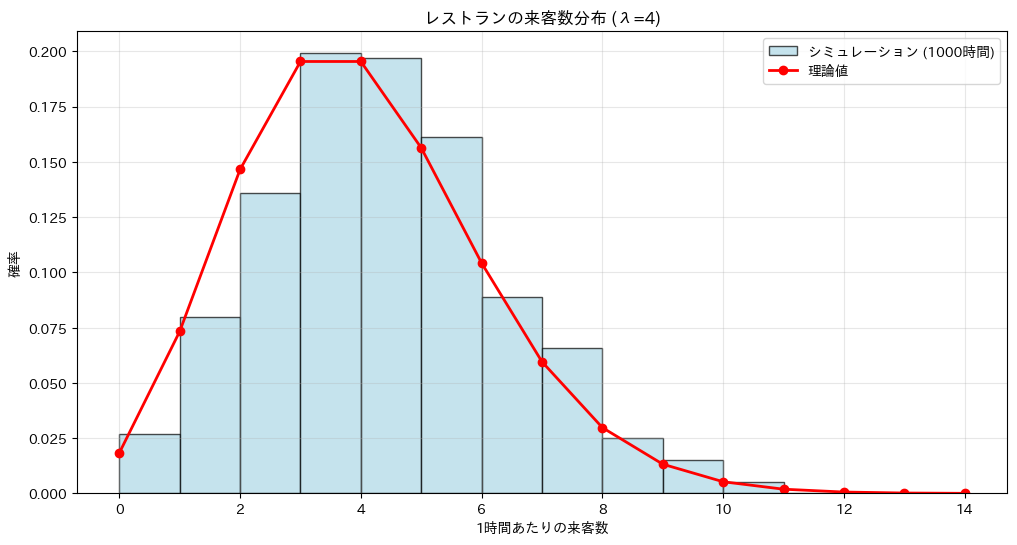

3. シミュレーション結果:
   平均来客数: 3.92人/時間
   理論値: 4人/時間
4. 最も忙しい上位5%の時間:
   シミュレーション: 7人以上
   理論値: 8人以上


In [4]:
# 平均来客数は1時間に4人
lambda_customers = 4

# ここに解答を書いてください
# 1. 1時間に誰も来ない確率を計算
prob_0_customers = stats.poisson.pmf(0, lambda_customers)
print(f"1. 1時間に誰も来ない確率: {prob_0_customers:.4f} ({prob_0_customers*100:.2f}%)")

# 2. 1時間に5人以上来る確率を計算
prob_5_or_more = 1 - stats.poisson.cdf(4, lambda_customers)
print(f"2. 1時間に5人以上来る確率: {prob_5_or_more:.4f} ({prob_5_or_more*100:.2f}%)")

# 3. 1000時間分のシミュレーションを行い、実際の分布を可視化
np.random.seed(42)
simulated_customers = np.random.poisson(lambda_customers, size=1000)

plt.figure(figsize=(12, 6))

# ヒストグラム
plt.hist(simulated_customers, bins=range(0, 15), density=True, alpha=0.7, 
         color='lightblue', edgecolor='black', label='シミュレーション (1000時間)')

# 理論値
x_theory = np.arange(0, 15)
y_theory = stats.poisson.pmf(x_theory, lambda_customers)
plt.plot(x_theory, y_theory, 'ro-', label='理論値', linewidth=2, markersize=6)

plt.xlabel('1時間あたりの来客数')
plt.ylabel('確率')
plt.title(f'レストランの来客数分布 (λ={lambda_customers})')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"3. シミュレーション結果:")
print(f"   平均来客数: {np.mean(simulated_customers):.2f}人/時間")
print(f"   理論値: {lambda_customers}人/時間")


# 4. 最も忙しい上位5%の時間では、何人以上の来客があるか計算
percentile_95 = np.percentile(simulated_customers, 95)
# 理論的計算
theoretical_95 = stats.poisson.ppf(0.95, lambda_customers)

print(f"4. 最も忙しい上位5%の時間:")
print(f"   シミュレーション: {percentile_95:.0f}人以上")
print(f"   理論値: {theoretical_95:.0f}人以上")

### 問題2: 試験の成績分析
ある試験の点数が正規分布に従うとします。

1. 80点以上取る確率: 0.1587 (15.87%
2. 50点未満（不合格）の確率: 0.0228 (2.28%)
3. 上位10%に入る点数: 82.8点以上


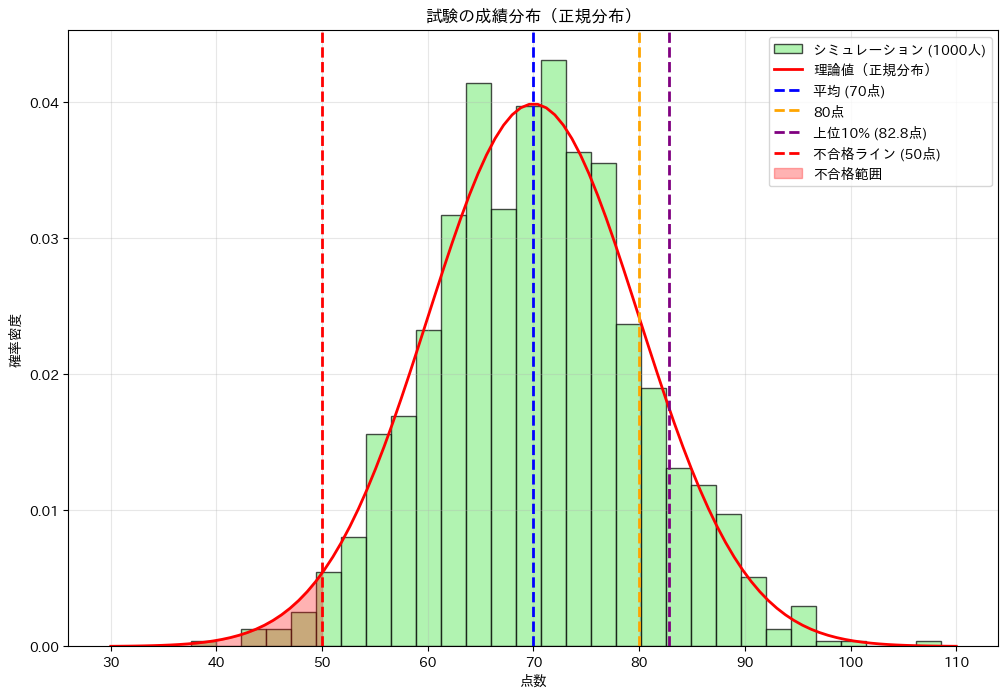

4. シミュレーション結果:
   平均点: 70.2点
   標準偏差: 9.8点
   最高点: 108.5点
   最低点: 37.6点
5. あなたが75点を取った場合:
   Z値: 0.50
   下位69.1%（上位30.9%）
   1000人中の順位: 約309位


In [6]:
# 平均70点、標準偏差10点
exam_mean = 70
exam_std = 10

# ここに解答を書いてください
# 1. 80点以上取る確率を計算
prob_80_or_more = 1 - stats.norm.cdf(80, exam_mean, exam_std)
print(f"1. 80点以上取る確率: {prob_80_or_more:.4f} ({prob_80_or_more*100:.2f}%")

# 2. 50点未満（不合格）の確率を計算
prob_under_50 = stats.norm.cdf(50, exam_mean, exam_std)
print(f"2. 50点未満（不合格）の確率: {prob_under_50:.4f} ({prob_under_50*100:.2f}%)")
      
# 3. 上位10%に入るには何点以上必要か計算
score_top_10_percent = stats.norm.ppf(0.9, exam_mean, exam_std)
print(f"3. 上位10%に入る点数: {score_top_10_percent:.1f}点以上")

# 4. 1000人の受験者の点数をシミュレーションし、分布を可視化
np.random.seed(42)
simulated_scores = np.random.normal(exam_mean, exam_std, size=1000)

plt.figure(figsize=(12, 8))

# ヒストグラム
plt.hist(simulated_scores, bins=30, density=True, alpha=0.7, color='lightgreen', 
         edgecolor='black', label='シミュレーション (1000人)')

# 理論的な正規分布曲線
x = np.linspace(30, 110, 100)
y = stats.norm.pdf(x, exam_mean, exam_std)
plt.plot(x, y, 'r-', linewidth=2, label='理論値（正規分布）')

# 重要な点数をマーク
plt.axvline(exam_mean, color='blue', linestyle='--', linewidth=2, label=f'平均 ({exam_mean}点)')
plt.axvline(80, color='orange', linestyle='--', linewidth=2, label='80点')
plt.axvline(score_top_10_percent, color='purple', linestyle='--', linewidth=2, 
            label=f'上位10% ({score_top_10_percent:.1f}点)')
plt.axvline(50, color='red', linestyle='--', linewidth=2, label='不合格ライン (50点)')

# 不合格範囲を塗りつぶし
x_fail = np.linspace(30, 50, 100)
y_fail = stats.norm.pdf(x_fail, exam_mean, exam_std)
plt.fill_between(x_fail, y_fail, alpha=0.3, color='red', label='不合格範囲')

plt.xlabel('点数')
plt.ylabel('確率密度')
plt.title('試験の成績分布（正規分布）')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"4. シミュレーション結果:")
print(f"   平均点: {np.mean(simulated_scores):.1f}点")
print(f"   標準偏差: {np.std(simulated_scores):.1f}点")
print(f"   最高点: {np.max(simulated_scores):.1f}点")
print(f"   最低点: {np.min(simulated_scores):.1f}点")

# 5. あなたが75点を取った場合のZ値と順位を計算
my_score = 75
z_score = (my_score - exam_mean) / exam_std
percentile = stats.norm.cdf(z_score) * 100
rank_from_top = 100 - percentile

print(f"5. あなたが75点を取った場合:")
print(f"   Z値: {z_score:.2f}")
print(f"   下位{percentile:.1f}%（上位{rank_from_top:.1f}%）")
print(f"   1000人中の順位: 約{rank_from_top*10:.0f}位")

## まとめ

今日学んだこと：

1. **確率の基本**
   - 確率は0〜1の値
   - 大数の法則

2. **離散確率分布**
   - ベルヌーイ分布（成功/失敗）
   - 二項分布（n回中の成功回数）
   - ポアソン分布（稀な事象の発生回数）

3. **連続確率分布**
   - 正規分布（最も重要な分布）
   - 標準正規分布（Z分布）
   - 一様分布、指数分布

4. **実用応用**
   - 品質管理（不良率の計算）
   - 確率計算による意思決定

確率分布は、データの背後にあるパターンを理解し、
未来を予測するための重要なツールです！

In [ ]:
# 平均来客数は1時間に4人
lambda_customers = 4

print("🏪 レストランの来客分析 - 解答例")
print("=" * 40)

# 1. 1時間に誰も来ない確率を計算
prob_0_customers = stats.poisson.pmf(0, lambda_customers)
print(f"1. 1時間に誰も来ない確率: {prob_0_customers:.4f} ({prob_0_customers*100:.2f}%)")

# 2. 1時間に5人以上来る確率を計算
prob_5_or_more = 1 - stats.poisson.cdf(4, lambda_customers)
print(f"2. 1時間に5人以上来る確率: {prob_5_or_more:.4f} ({prob_5_or_more*100:.2f}%)")

# 3. 1000時間分のシミュレーションを行い、実際の分布を可視化
np.random.seed(42)
simulated_customers = np.random.poisson(lambda_customers, size=1000)

plt.figure(figsize=(12, 6))

# ヒストグラム
plt.hist(simulated_customers, bins=range(0, 15), density=True, alpha=0.7, 
         color='lightblue', edgecolor='black', label='シミュレーション (1000時間)')

# 理論値
x_theory = np.arange(0, 15)
y_theory = stats.poisson.pmf(x_theory, lambda_customers)
plt.plot(x_theory, y_theory, 'ro-', label='理論値', linewidth=2, markersize=6)

plt.xlabel('1時間あたりの来客数')
plt.ylabel('確率')
plt.title(f'レストランの来客数分布 (λ={lambda_customers})')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"3. シミュレーション結果:")
print(f"   平均来客数: {np.mean(simulated_customers):.2f}人/時間")
print(f"   理論値: {lambda_customers}人/時間")

# 4. 最も忙しい上位5%の時間では、何人以上の来客があるか計算
percentile_95 = np.percentile(simulated_customers, 95)
# 理論的計算
theoretical_95 = stats.poisson.ppf(0.95, lambda_customers)

print(f"4. 最も忙しい上位5%の時間:")
print(f"   シミュレーション: {percentile_95:.0f}人以上")
print(f"   理論値: {theoretical_95:.0f}人以上")

In [ ]:
# 平均70点、標準偏差10点
exam_mean = 70
exam_std = 10

print("📝 試験の成績分析 - 解答例")
print("=" * 35)

# 1. 80点以上取る確率を計算
prob_80_or_more = 1 - stats.norm.cdf(80, exam_mean, exam_std)
print(f"1. 80点以上取る確率: {prob_80_or_more:.4f} ({prob_80_or_more*100:.2f}%)")

# 2. 50点未満（不合格）の確率を計算
prob_under_50 = stats.norm.cdf(50, exam_mean, exam_std)
print(f"2. 50点未満（不合格）の確率: {prob_under_50:.4f} ({prob_under_50*100:.2f}%)")

# 3. 上位10%に入るには何点以上必要か計算
score_top_10_percent = stats.norm.ppf(0.9, exam_mean, exam_std)
print(f"3. 上位10%に入る点数: {score_top_10_percent:.1f}点以上")

# 4. 1000人の受験者の点数をシミュレーションし、分布を可視化
np.random.seed(42)
simulated_scores = np.random.normal(exam_mean, exam_std, size=1000)

plt.figure(figsize=(12, 8))

# ヒストグラム
plt.hist(simulated_scores, bins=30, density=True, alpha=0.7, color='lightgreen', 
         edgecolor='black', label='シミュレーション (1000人)')

# 理論的な正規分布曲線
x = np.linspace(30, 110, 100)
y = stats.norm.pdf(x, exam_mean, exam_std)
plt.plot(x, y, 'r-', linewidth=2, label='理論値（正規分布）')

# 重要な点数をマーク
plt.axvline(exam_mean, color='blue', linestyle='--', linewidth=2, label=f'平均 ({exam_mean}点)')
plt.axvline(80, color='orange', linestyle='--', linewidth=2, label='80点')
plt.axvline(score_top_10_percent, color='purple', linestyle='--', linewidth=2, 
            label=f'上位10% ({score_top_10_percent:.1f}点)')
plt.axvline(50, color='red', linestyle='--', linewidth=2, label='不合格ライン (50点)')

# 不合格範囲を塗りつぶし
x_fail = np.linspace(30, 50, 100)
y_fail = stats.norm.pdf(x_fail, exam_mean, exam_std)
plt.fill_between(x_fail, y_fail, alpha=0.3, color='red', label='不合格範囲')

plt.xlabel('点数')
plt.ylabel('確率密度')
plt.title('試験の成績分布（正規分布）')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"4. シミュレーション結果:")
print(f"   平均点: {np.mean(simulated_scores):.1f}点")
print(f"   標準偏差: {np.std(simulated_scores):.1f}点")
print(f"   最高点: {np.max(simulated_scores):.1f}点")
print(f"   最低点: {np.min(simulated_scores):.1f}点")

# 5. あなたが75点を取った場合のZ値と順位を計算
my_score = 75
z_score = (my_score - exam_mean) / exam_std
percentile = stats.norm.cdf(z_score) * 100
rank_from_top = 100 - percentile

print(f"5. あなたが75点を取った場合:")
print(f"   Z値: {z_score:.2f}")
print(f"   下位{percentile:.1f}%（上位{rank_from_top:.1f}%）")
print(f"   1000人中の順位: 約{rank_from_top*10:.0f}位")